# Genetic algorithm

In [2]:
# Imports
import pickle
import time
import matplotlib.pyplot as plt
import numpy as np
import sys
from qiskit.quantum_info import SparsePauliOp
sys.path.append('../../../')
from src import customFunc as cf
from src import ansatzs as anz
from src import mitigation as mit

## Observables


In [2]:
# Hamiltonians
with open(f"data/H2_hamiltonian.pkl", "rb") as f:
    hamiltonian_H2 = pickle.load(f)

Z1Z2_obs = SparsePauliOp.from_list([("ZZ", -1)])

### Z1Z2 2-local

In [ ]:
# Numero de experimentos (optimizaciones) a realizar
n_experiments = 1000

# Población a usar en este experimento
pop = 10

# Guardare los datos de los experimentos
evaluations_exp = np.zeros(n_experiments)
generations_exp = np.zeros(n_experiments)
time_exp = np.zeros(n_experiments)

for iter in range(1000):

    t0 = time.time()
    data_Z1Z2_2local = mit.VQE_minimization_AG(anz.build_twoLocal_ansatz(2, 2)[0], Z1Z2_obs, -0.9, population_size=pop, max_iters=1000, print_info=False, plot_info=False)
    t1 = time.time()

    generations_exp[iter] = data_Z1Z2_2local["n_generations"]
    evaluations_exp[iter] = data_Z1Z2_2local["n_evaluations"]
    time_exp[iter] = t1-t0

    print(f"Experiment {iter} terminated with {data_Z1Z2_2local['n_generations']} generations.\n")

# Junto todos los datos en un array y los guardo en txt
array_to_save = np.column_stack((generations_exp, evaluations_exp, time_exp))
np.savetxt(f"data/data_GA_Z1Z2_twolocal_{pop}.csv", array_to_save, fmt="%d", delimiter=",")

Experiment 0 terminated with 1 generations.

Experiment 1 terminated with 150 generations.

Experiment 2 terminated with 0 generations.

Experiment 3 terminated with 1 generations.

Experiment 4 terminated with 0 generations.

Experiment 5 terminated with 2 generations.

Experiment 6 terminated with 107 generations.

Experiment 7 terminated with 0 generations.

Experiment 8 terminated with 0 generations.

Experiment 9 terminated with 38 generations.

Experiment 10 terminated with 0 generations.

Experiment 11 terminated with 517 generations.

Experiment 12 terminated with 0 generations.

Experiment 13 terminated with 1000 generations.

Experiment 14 terminated with 0 generations.

Experiment 15 terminated with 0 generations.

Experiment 16 terminated with 4 generations.

Experiment 17 terminated with 3 generations.

Experiment 18 terminated with 0 generations.

Experiment 19 terminated with 12 generations.

Experiment 20 terminated with 291 generations.

Experiment 21 terminated with 0

TypeError: column_stack() takes 1 positional argument but 3 were given

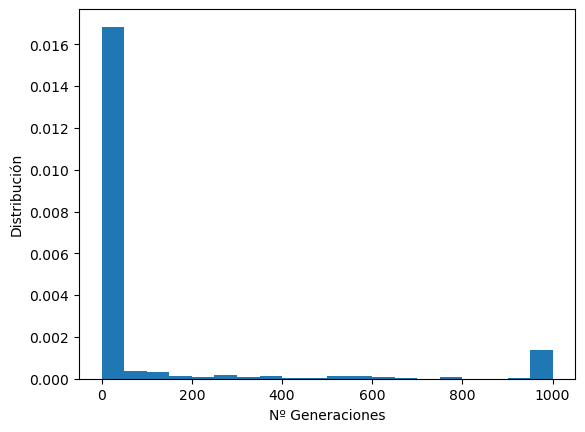

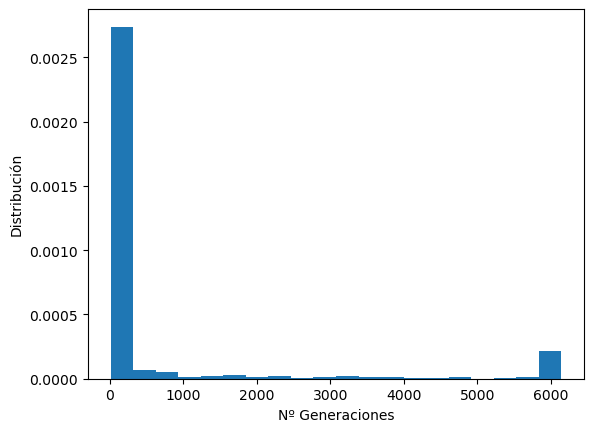

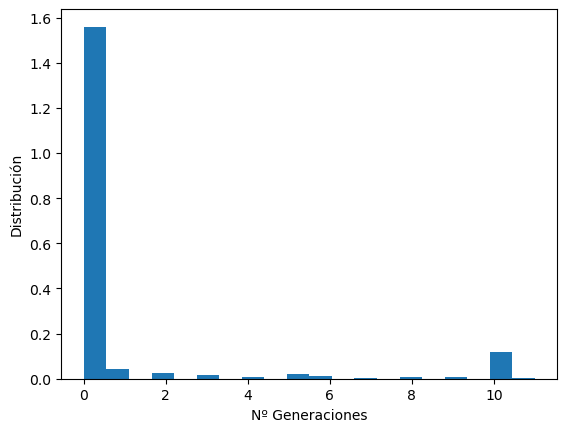

In [ ]:
# Cargo los datos
loaded_data = np.loadtxt("data/data_GA_Z1Z2_twolocal_10.csv", delimiter=",")

n_bars = 20

# Generations histogram
hist = np.histogram(loaded_data[:, 0], 20, density=True)
max_value = np.max(loaded_data[:, 0])
plt.bar(hist[1][:-1]+max_value/n_bars/2, hist[0], max_value/n_bars)
plt.ylabel("Distribución")
plt.xlabel("Nº Generaciones")
plt.show()

# Evaluations histogram
hist = np.histogram(loaded_data[:, 1], 20, density=True)
max_value = np.max(loaded_data[:, 1])
plt.bar(hist[1][:-1]+max_value/n_bars/2, hist[0], max_value/n_bars)
plt.ylabel("Distribución")
plt.xlabel("Nº Evaluaciones Función de coste")
plt.show()

# Time histogram
hist = np.histogram(loaded_data[:, 2], 20, density=True)
max_value = np.max(loaded_data[:, 2])
plt.bar(hist[1][:-1]+max_value/n_bars/2, hist[0], max_value/n_bars)
plt.ylabel("Distribución")
plt.xlabel("Tiempo de ejecución (s)")
plt.show()

### H2 N-local

In [ ]:
# Numero de experimentos (optimizaciones) a realizar
n_experiments = 1000

# Población a usar en este experimento
pop = 50

# Guardare los datos de los experimentos
evaluations_exp = np.zeros(n_experiments)
generations_exp = np.zeros(n_experiments)
time_exp = np.zeros(n_experiments)

for iter in range(1000):

    t0 = time.time()
    data_H2_2local = mit.VQE_minimization_AG(anz.build_Nlocal_ansatz(4,2)[0], hamiltonian_H2, -1.75, population_size=pop, max_iters=1000, print_info=False, plot_info=False)
    t1 = time.time()

    generations_exp[iter] = data_H2_2local["n_generations"]
    evaluations_exp[iter] = data_H2_2local["n_evaluations"]
    time_exp[iter] = t1-t0

    print(f"Experiment {iter} terminated \n")

# Junto todos los datos en un array y los guardo en txt
array_to_save = np.column_stack((generations_exp, evaluations_exp, time_exp))
np.savetxt(f"data/data_GA_H2_Nlocal_{pop}.csv", array_to_save, fmt="%d", delimiter=",")

NameError: name 'np' is not defined

Text(0.5, 0, 'Nº Generaciones')

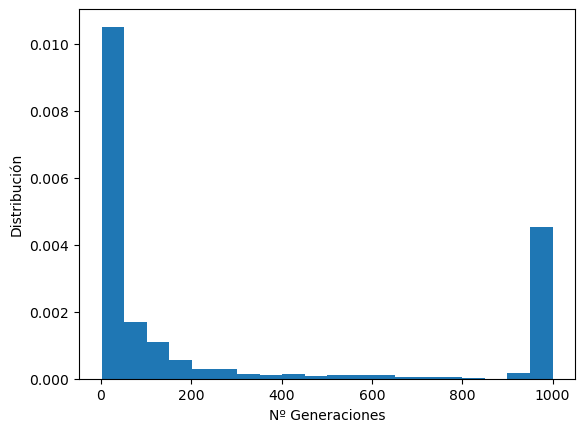

In [34]:
# Cargo los datos
loaded_data = np.loadtxt("data/data_GA_H2_Nlocal_50.csv", delimiter=",")

n_experiments = 1000
n_bars = 20

gen_hist = np.histogram(loaded_data[:, 0], 20, density=True)
plt.bar(gen_hist[1][:-1]+n_experiments/n_bars/2, gen_hist[0], n_experiments/n_bars)
plt.ylabel("Distribución")
plt.xlabel("Nº Generaciones")

## H2O Molecule

In [ ]:
# Hamiltonians
with open(f"H2O/data/hamiltonian1.000.pkl", "rb") as f:
    hamiltonian_H2O = pickle.load(f)

### N-local


Preparando ejecución para 14 qubits.
Se usarán 63 parámetros


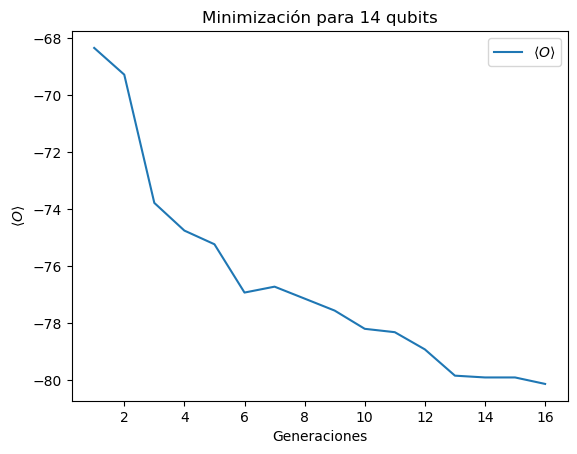

Fin ejecución con 14 qubits. Mínimo encontrado: -80.1390479077481
Número de generaciones: 16
Número de evaluaciones de la función de coste: 1076

Preparando ejecución para 15 qubits.
Se usarán 66 parámetros


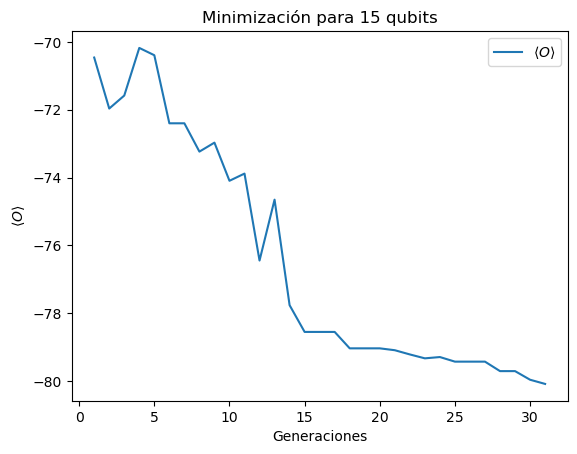

Fin ejecución con 15 qubits. Mínimo encontrado: -80.08257050709199
Número de generaciones: 31
Número de evaluaciones de la función de coste: 1976

Preparando ejecución para 16 qubits.
Se usarán 72 parámetros


KeyboardInterrupt: 

In [ ]:
data_H20_Nlocal = mit.VQE_minimization_AG(anz.build_Nlocal_ansatz, 14, 14, hamiltonian_H2O, -80, population_size=100, max_iters=1000)

### 2-local


Preparando ejecución para 14 qubits.
Se usarán 28 parámetros


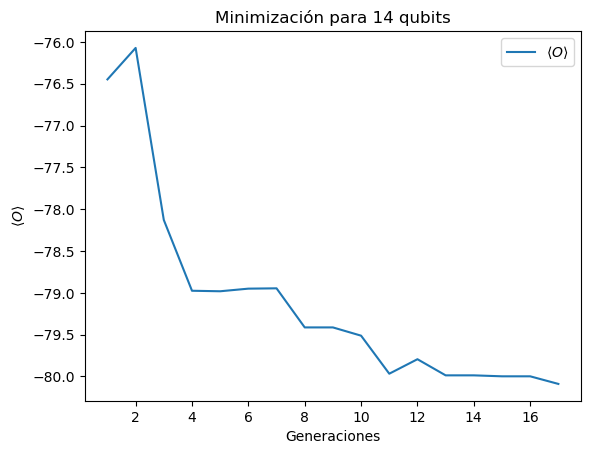

Fin ejecución con 14 qubits. Mínimo encontrado: -80.0894404108026
Número de generaciones: 17
Número de evaluaciones de la función de coste: 575


In [ ]:
data_H2O_2local = mit.VQE_minimization_AG(anz.build_twoLocal_ansatz, 14, 14, hamiltonian_H2O, -80, population_size=50, max_iters=1000)

In [ ]:
from scipy.optimize import differential_evolution


# ====================================================================
#            VQE implementation for BP study
# ====================================================================
def VQE_minimization_DE(ansatz_function, minQubits: int, maxQubits: int, base_observable, initial_guess: str = "zero", print_info: bool = True, plot_info: bool = True):
    """
    Compute the VQE algorithm using different numbers of qubits, then plot the minimization progess and the derivatives information.
    -----------------------------------------
    Args:
        ansatz_function (method): A function defined as follows: ansatz_function(N_qubits (int)) -> qc (QuantumCircuit), num_params (int)
        minQubits (int): The smallest number of qubits used.
        maxQubits (int): The greatest number of qubits used.
        base_observable (SparsePauliOp): The observable to be measured in its minimal form, it should use minQubits number of qubits.
        index (list[int] or str): With respect to which parameters the derivative will be taken. If given "all", it calculates all the derivatives.
        initial_guess (str or NumPy 1D array): "zero" initial guess with all parameters equal to cero, "rand" -> random initial guess. 1D Array -> the initial guess. default="zero".
        minimizer (str): scipy.optimize.minimize possible optimization methods, default="COBYLA".
    -----------------------------------------
    Returns:
        (Dictionary): 
            "minimum_values" : (list[float]): A list containing the minimum found for every number of qubits.
            "n_qubits" : (list[int]): A list containing the number of qubits used.
    """

    data = {
        "n_qubits": [],
        "minimum_values": []
    }

    for i in range(minQubits, maxQubits+1):

        estimator = Estimator()
        
        current_observable = cf.expand_observable(base_observable, i)
        ansatz_circuit, num_params = ansatz_function(i)

        # Initial parameters
        if initial_guess == "rand":
            initial_param_vector = np.random.random(num_params)
        elif initial_guess == "zero":
            initial_param_vector = np.zeros(num_params)
        elif initial_guess is np.ndarray():
            initial_param_vector = initial_guess
        else:
            print("Invalid initial guess, using all parameters as zero")

        # Current iteration information
        if print_info:
            print("\n=====================================================")
            print(f"Preparando ejecución para {i} qubits.")
            print(f"Se usarán {num_params} parámetros")

        # Dictionary to save the evolution of the cost function
        cost_history_dict = {
            "iters": 0,
            "cost_history": []
        }
        
        def cost_func(params, ansatz, observable, estimator):

            cost = cf.evaluate_observable(params, ansatz, observable, estimator)
            cost_history_dict["iters"] += 1
            cost_history_dict["cost_history"].append(cost)

            return cost

        # Optimization
        res = differential_evolution(
            cost_func,
            bounds=[(0, 2*np.pi) for n in range(num_params)],
            args=(ansatz_circuit, current_observable, estimator)
        )

        # Save the results in the dictionary
        data["n_qubits"].append(i)
        data["minimum_values"].append(res.fun)

        # Show the evolution of the cost function
        if plot_info:
            fig, ax = plt.subplots()
            ax.plot(range(cost_history_dict["iters"]), cost_history_dict["cost_history"], label=r"$\langle O\rangle$")

            ax.set_xlabel("Iteraciones")
            ax.set_ylabel(r"$\langle O\rangle$")
            ax.set_title(f"Minimización para {i} qubits")
            plt.legend()
            plt.show()

        if plot_info:
            print(f"Fin ejecución con {i} qubits. Mínimo encontrado: {res.fun}")
            print("=====================================================")

    return data


Preparando ejecución para 4 qubits.
Se usarán 18 parámetros


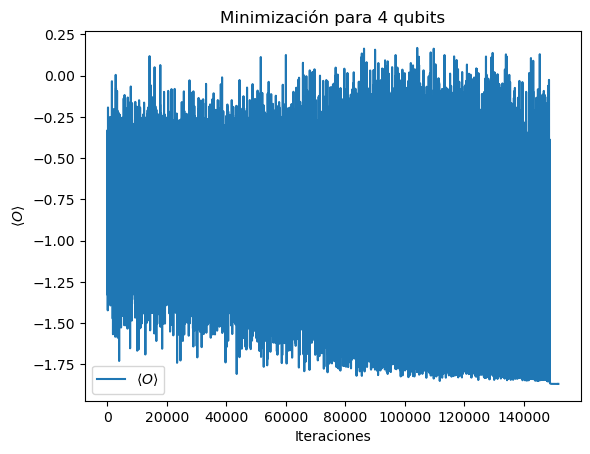

Fin ejecución con 4 qubits. Mínimo encontrado: -1.8680386376751572

Preparando ejecución para 5 qubits.
Se usarán 21 parámetros


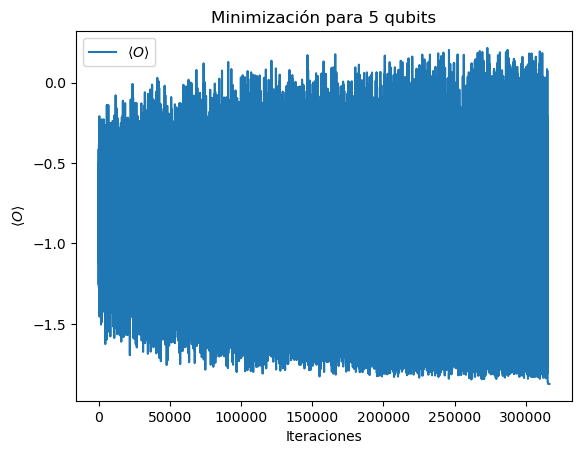

Fin ejecución con 5 qubits. Mínimo encontrado: -1.8733235813363935

Preparando ejecución para 6 qubits.
Se usarán 27 parámetros


KeyboardInterrupt: 

In [18]:
# Hamiltonians
with open(f"H2/data/hamiltonian0.719.pkl", "rb") as f:
    hamiltonian = pickle.load(f)


data = VQE_minimization_DE(anz.build_Nlocal_ansatz, 4, 12, hamiltonian)